In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\ANJALI\Downloads\ratings.csv\ratings.csv")
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [87]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [89]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [90]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [91]:
df1=pd.read_csv(r"C:\Users\ANJALI\Downloads\tags.csv")
df1=df1[['movieId','tag']]
df1.head()

,movieId,tag
0,60756,funny
1,60756,Highly quotable
2,60756,will ferrell
3,89774,Boxing story
4,89774,MMA


In [92]:
df.shape

(100836, 4)

In [93]:
df1.shape

(3683, 2)

In [94]:
df=pd.merge(df,df1,on='movieId')

In [95]:
df.head()

,userId,movieId,rating,timestamp,tag
0,1,1,4.0,964982703,pixar
1,1,1,4.0,964982703,pixar
2,1,1,4.0,964982703,fun
3,1,3,4.0,964981247,moldy
4,1,3,4.0,964981247,old


In [96]:
df.shape

(233213, 5)

# Exploratory data analysis

In [97]:
df['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 0.5, 2.5, 1.5])

In [98]:
df.groupby('tag')['rating'].mean().sort_values(ascending=False).head()

tag
free to download    5.0
creativity          5.0
human rights        5.0
procedural          5.0
no dialogue         5.0
Name: rating, dtype: float64

In [99]:
df.groupby('tag')['rating'].count().sort_values(ascending=False).head()

tag
sci-fi               2527
thought-provoking    2487
twist ending         2434
atmospheric          2227
dark comedy          2056
Name: rating, dtype: int64

In [100]:
df['tag'].nunique()

1584

In [101]:
ratings=pd.DataFrame(df.groupby('tag')['rating'].mean())

In [102]:
ratings.head()

,rating
tag,
"""artsy""",3.500000
06 Oscar Nominated Best Movie - Animation,3.750000
1900s,4.100000
1920s,4.025000
1950s,3.946429


In [103]:
ratings['num of ratings']=pd.DataFrame(df.groupby('tag')['rating'].count())

In [104]:
ratings.head()

,rating,num of ratings
tag,,
"""artsy""",3.500000,3
06 Oscar Nominated Best Movie - Animation,3.750000,114
1900s,4.100000,10
1920s,4.025000,40
1950s,3.946429,28


<Axes: >

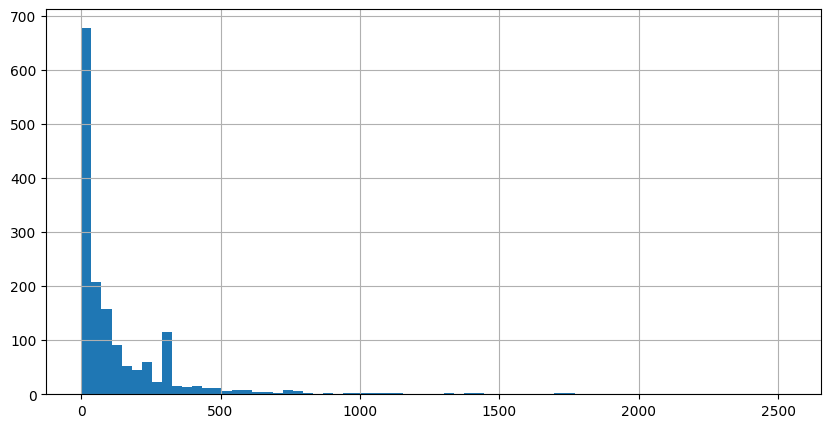

In [105]:
plt.figure(figsize=(10,5))
ratings['num of ratings'].hist(bins=70)

<Axes: >

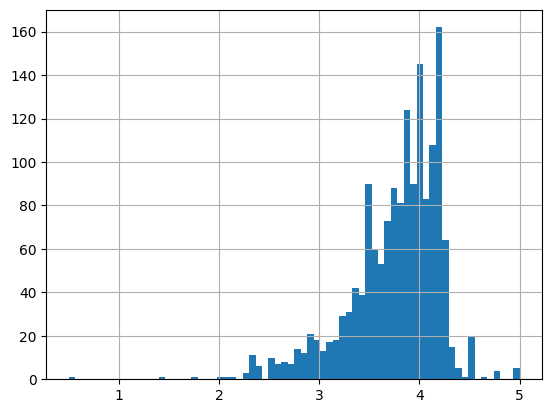

In [106]:
ratings['rating'].hist(bins=70)

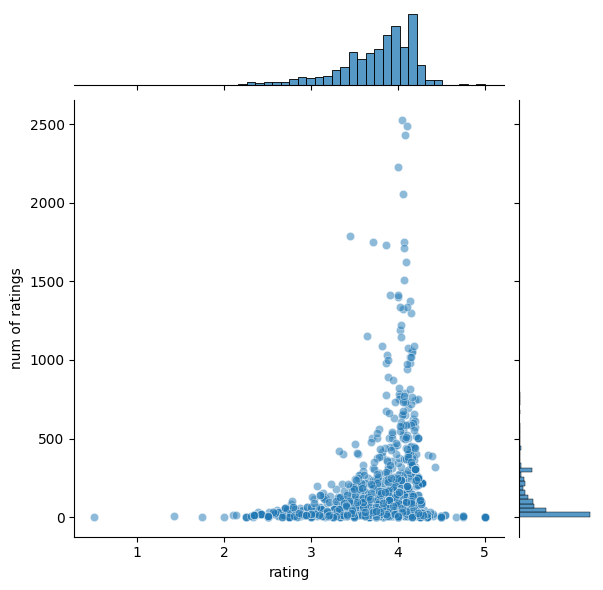

In [107]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommending similar movies

In [108]:
#pivot table is used to summarize,explore and present data in a structured format.
moviemat=df.pivot_table(index='userId',columns='tag',values='rating')

In [109]:
moviemat

tag,"""artsy""",06 Oscar Nominated Best Movie - Animation,1900s,1920s,1950s,1960s,1970s,1980s,1990s,2001-like,...,women,wonderwoman,workplace,writing,wrongful imprisonment,wry,younger men,zither,zoe kazan,zombies
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,5.0,5.0,NaN,NaN,3.0,1.0,NaN,...,NaN,NaN,NaN,3.500000,NaN,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,5.000000,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.5,4.25,NaN,NaN,NaN,4.0,4.0,3.5,5.0,NaN,...,NaN,NaN,NaN,3.666667,3.5,3.0,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,5.0,NaN,...,NaN,NaN,5.0,3.500000,4.5,NaN,NaN,NaN,NaN,3.875


In [110]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
tag,,
sci-fi,4.045706,2527
thought-provoking,4.100925,2487
twist ending,4.085045,2434
atmospheric,4.006960,2227
dark comedy,4.061041,2056
superhero,3.454393,1787
psychology,4.074571,1750
Disney,3.711098,1748
time travel,3.867919,1730


In [111]:
ratings.head()

,rating,num of ratings
tag,,
"""artsy""",3.500000,3
06 Oscar Nominated Best Movie - Animation,3.750000,114
1900s,4.100000,10
1920s,4.025000,40
1950s,3.946429,28


In [112]:
sci_fi_user_ratings=moviemat['sci-fi']
thought_provoking_ratings=moviemat['thought-provoking']
sci_fi_user_ratings.head()

userId
1    4.714286
2    3.333333
3         NaN
4    4.200000
5    3.000000
Name: sci-fi, dtype: float64

In [113]:
#try to correlate with the above value

In [114]:
similar_to_sci_fi=moviemat.corrwith(sci_fi_user_ratings)
similar_to_thought_provoking=moviemat.corrwith(thought_provoking_ratings)

C:\Users\ANJALI\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\ANJALI\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\ANJALI\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ANJALI\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\ANJALI\AppData\Roaming\Python\Python39\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [115]:
corr_sci_fi=pd.DataFrame(similar_to_sci_fi,columns=['Correlation'])

In [116]:
corr_sci_fi.dropna(inplace=True)

In [117]:
corr_sci_fi.head()
#if there is high correlation,that is more recommended

,Correlation
tag,
06 Oscar Nominated Best Movie - Animation,0.270610
1900s,0.544553
1920s,0.193041
1950s,0.334521
1960s,0.141703


In [118]:
corr_sci_fi.sort_values('Correlation',ascending=False).head(10)

,Correlation
tag,
televangelist,1.0
70mm,1.0
ryan reynolds,1.0
bad humor,1.0
uncomfortable,1.0
male nudity,1.0
allegorical,1.0
enjoyable,1.0
sci-fi,1.0


In [119]:
#Let's filter this to find which tag have less than 100 reviews

In [120]:
corr_sci_fi=corr_sci_fi.join(ratings['num of ratings'])

In [121]:
corr_sci_fi.head()

,Correlation,num of ratings
tag,,
06 Oscar Nominated Best Movie - Animation,0.270610,114
1900s,0.544553,10
1920s,0.193041,40
1950s,0.334521,28
1960s,0.141703,37


In [122]:
corr_sci_fi[corr_sci_fi['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
tag,,
sci-fi,1.000000,2527
Star Wars,0.842612,502
Nerd,0.842612,251
space action,0.842612,502
space adventure,0.842612,251


In [123]:
corr_thought_provoking=pd.DataFrame(similar_to_thought_provoking,columns=['Correlation'])
corr_thought_provoking.dropna(inplace=True)
corr_thought_provoking.head()

,Correlation
tag,
06 Oscar Nominated Best Movie - Animation,0.330187
1900s,0.231904
1920s,0.053740
1950s,-0.050129
1960s,0.499315


In [124]:
corr_thought_provoking.sort_values('Correlation',ascending=False)

,Correlation
tag,
70mm,1.0
bad humor,1.0
male nudity,1.0
ethics,1.0
thought-provoking,1.0
...,...
Big Brothers,-1.0
multiple roles,-1.0
Existential,-1.0


In [125]:
corr_thought_provoking=corr_thought_provoking.join(ratings['num of ratings'])

In [126]:
corr_thought_provoking[corr_thought_provoking['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
tag,,
thought-provoking,1.000000,2487
complicated,0.879070,361
psychological,0.860326,1339
violent,0.858116,553
intellectual,0.852329,450


# Finished....!